# Lecture 5 - Probability, Conditional Probability, Independence, and Prediction


## Announcements

* Data Ethics 1 due Wednesday; discussion in class.
* How's lab 1 going?
  * Numpy slicing magic (plus some) examples:
    * <https://github.com/harskish/tlgan?tab=readme-ov-file#disentangling-random-and-cyclic-effects-in-time-lapse-sequences>
    * <https://vision.huji.ac.il/videowarping/>


## Goals:
* Think about what makes a good data science question and practice formulating some of your own. (Skiena 1.2)

* Know the definition and implications of independence
  * Know the definition of have intuition for conditional probability
  * Wrongly assuming independence can lead to poor modeling/predictions
  * A lack of independence leads to correlations, which is where modeling/predictive power comes from

## Asking interesting data questions

* Consider a couple example datasets:
 * IMDB: All things movies. <https://developer.imdb.com/non-commercial-datasets/>
   * Films: title, duration, genre tags, date, cast, crew, user ratings, critic ratings, ...
   * People (actors, directors, writers, producers, crew): appearances/credits, birth/death dates, height, awards, ...
 * Boston Bike Share data: https://www.bluebikes.com/system-data
   * Trips: Trip Duration, Start Time and Date, Stop Time and Date, Start Station Name & ID, End Station Name & ID, Bike ID, User Type (Casual = Single Trip or Day Pass user; Member = Annual or Monthly Member), Birth Year, Gender (self-reported by member)
   * Stations: ID, Name, GPS coordinates, # docks

* **Exercise, as a table:** Come up with at least one interesting question you might want to answer with each of these datasets.




### Ideas from the class:
IMDB
* 

Bikes
* 

**Insight**: Datasets can often answer questions that the data isn't directly about.
 * Example: baseball stats (http://www.baseball-reference.com) has details about ~20,000 major league baseball players over the last 150 years. This data includes handedness and birth/death dates, so we can study a possible link between handedness and lifespan.

### Probability and Statistics, Continued

As a reminder,
* Probability: how we model real-world data generating processes
* Statistics: how we describe and infer things about those processes

There are many dual concepts:
* We saw last time that we can use a **histogram** as an estimate of the **probability density function**.

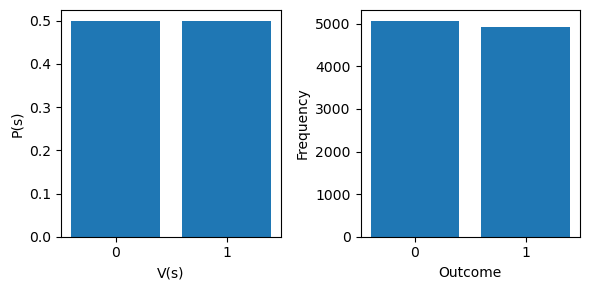

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(6,3))
# probability density function of a fair coin toss:
axs[0].bar(["0", "1"], [0.5, 0.5])
axs[0].set_xlabel("V(s)")
axs[0].set_ylabel("P(s)")

# histogram of 10,000 fair coin tosses:
import random
N = 10000
outcomes = []
for i in range(N):
    outcomes.append(random.choice(("H", "T")))

n_heads = 0
n_tails = 0
for out in outcomes:
    if out == "H":
        n_heads += 1
    if out == "T":
        n_tails += 1

axs[1].bar(["0", "1"], [n_tails, n_heads])
axs[1].set_xlabel("Outcome")
axs[1].set_ylabel("Frequency")
plt.tight_layout()

* The **mean** of a dataset gives an estimate of the **expected value** of the random variable being measured.
* (and many more) 

### Conditional Probability and Independence

Simple probability experiments like rolling two dice produce math that's friendly and easy to work with. The outcome of one die doesn't affect the outcome of the other.

Real life is rarely so simple.

A **joint probability distribution** on two random variables $P(X, Y)$ is the probability of each possible combination of values of $X$ and $Y$.

If $X$ is the number on the first die and $Y$ is the number on the second die, $P(X,Y)$ has a friendly property: $$P(X, Y) = P(X) P(Y)$$

Let's see why with our physically-improbable three-sided dice (written notes).

In convincing ourselves of the above properly, we sneakily started talking about **conditional probability**: a probability of something *given* that you know something else. In our dice example, the probability of die 2 being 1 *given* that die1 was a 1 was $1/3$. We write this in math as: 
$$P(Y=1 | X = 1) = 1/3$$
where the vertical bar $|$ is read as "given", or "conditioned on".

**Independence** is the property we described above: two events are **independent** if the outcome of one event doesn't affect, or change our understanding of the probability of another.

Another way to view independence is that the **conditional probability** is equal to the **unconditional** probability. For example,
$$P(Y = 1 | X = 1) = 1/3 = P(Y = 1)$$
The information that $X = 1$ doesn't add anything to our understanding of the situation.

When are events **not** independent? Most of the time.

An abstract, probability-theory-type example might be: you flip a fair coin; if that fair coin is heads, you roll a fair 3-sided die, but if it's tails you roll a weighted three-sided die whose odds of coming up 1 are 0.6, while the odds coming up 2 or 3 are 0.2 each.

**Exercise 1:** Let $C$ be the outcome of the coin flip and $D$ be the outcome of the die roll. write down the full **joint distribution** $P(C, D)$ for this experiment. I've given you the first one:
* $P(C=H, D=1) = 1/6$
* $P(C=H, D=2) = \hspace{1.6em}$
* $P(C=H, D=3) = \hspace{1.6em}$
* $P(C=T, D=1) = \hspace{1.6em}$
* $P(C=T, D=2) = \hspace{1.6em}$
* $P(C=T, D=3) = \hspace{1.6em}$

**Exercise 2:** What is $P(D=1 | C=T)$?

**Exercise 3:** What is $P(D=1)$?

### Less abstractly...

A fundamental assumption that data scientists implicitly make is that their data is generated by some process that follows the laws of probability. Let's look at a dataset and think about these concepts in terms of some of the columns therein.

This dataset is called NHANES and it consists of a bunch of different body measurements from a population of people. The code below loads the dataset, renames the columns with more sensible labesls, and drops the unique identifier for each person (SEQN), which we don't need.

In [3]:
import pandas as pd
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/NHANES/NHANES.csv"
cols_renamed = {"SEQN": "SEQN",
                "RIAGENDR": "Gender", # 1 = M, 2 = F
                "RIDAGEYR": "Age", # years
                "BMXWT": "Weight", # kg
                "BMXHT": "Height", # cm
                "BMXLEG": "Leg", # cm
                "BMXARML": "Arm", # cm
                "BMXARMC": "Arm Cir", # cm
                "BMXWAIST": "Waist Cir"} # cm

df = pd.read_csv(data_url)
df = df.rename(cols_renamed, axis='columns')
df = df.drop("SEQN", axis='columns')

Remember that **histograms** are like empircal estimates of probability distributions. If we think of two columns as random variables of the outcomes of an experiment in which "A human grows to be an adult", we can similarly about the empirical estimate of the joint probability distribution, whether the columns are independent, and the conditional probability of one column's value given the other.

First, let's filter out children:

In [4]:
df = df[df["Age"] >= 21]

Now let's consider the **age** and **height** columns. I'm going to use a nifty visualization from the Seaborn library, which we'll use when we dig deeper into visualization:

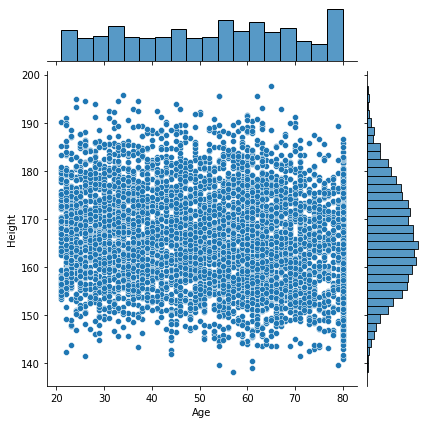

In [5]:
import seaborn as sns

sns.jointplot(x="Age", y="Height", data=df)

From the scatter plot, it doesn't appear that these variables have much to do with each other. This matches our intuition - once they reach adulthood, people don't grow or shrink (much) in height as they age. This leads to a hypothesis that these variables are **independent**. We can think about this in terms of conditional probability by seeing if the distribution of heights conditioned on each age is the same as the unconditional distribution.

The following plot shows our empirical estimate of $P($Height$)$ alongside an empirical estimate of $P($Height $|$ the person is in their 20s$)$:

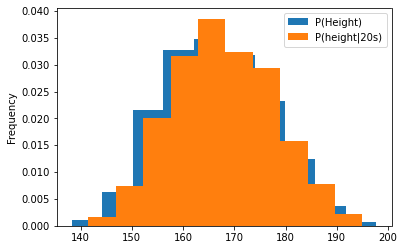

In [6]:
df["Height"].plot.hist(legend=True, label="P(Height)", density=True)
twenties = df[(df["Age"] >= 21) & (df["Age"] < 30)]
twenties["Height"].plot.hist(legend=True, label="P(height|20s)", density=True)

The `density=True` argument tells the plotting library to divide by the total so instead of counts, we get probability-like values that all sum to one. This allows the $y$ axis scale to be comparable across two histograms of different total values.

Let's pick a different pair of columns and do a similar analysis:

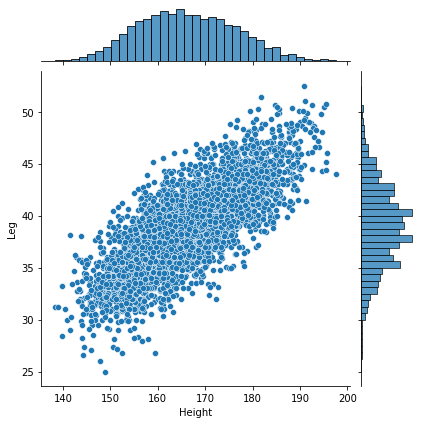

In [7]:
sns.jointplot(x="Height", y="Leg", data=df)

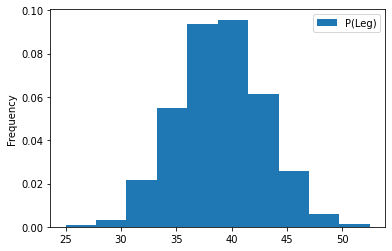

In [8]:
df["Leg"].plot.hist(legend=True, label="P(Leg)", density=True)

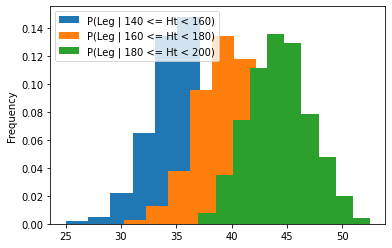

In [9]:
for height in [140, 160, 180]:
    mask = (df["Height"] >= height) & (df["Height"] < height+20)
    label = f"P(Leg | {height} <= Ht < {height+20})"
    df[mask]["Leg"].plot.hist(legend=True, label=label,  density=True)


These columns are decidedly **not** independent! There is a strong **correlation** between them (we'll come back to that word and use it more formally later on). In other words, $P(Leg | Height) \ne P(Leg)$. That means that if we know Height, we have a better idea of what to expect from Leg. This forms the basis of our ability to make **predictions** from data!

The key insight I want you to take away from this is that the presence of correlations - aka a lack of independence - in the data yield **predictive power**. Two implications:

* If there are no correlations, we're unlikely to be able to make predictions.
* The correlation between leg length and height is clearly due to a real, underlying relationship between height and leg length. Not all correlations are, though! It's important to keep in mind that when we find a correlation, we have only failed to rule out the possibility a causal relationship between the two variables; but we have not confirmed its existence. In other words: correlation does not imply causation.